In [1]:
# Import the necessary libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from qiskit.quantum_info import DensityMatrix
import pickle #For exporting the variables
from tqdm import tqdm




Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def initialize_all_zeros(nr_qubits):
    # Create a quantum circuit with N qubits
    qc = QuantumCircuit(nr_qubits)
    
    # Initialize all qubits in the |0⟩ state
    for qubit in range(nr_qubits):
        qc.initialize([1, 0], qubit)
    
    return qc

def apply_cnot_chain(qc, control_qubit, nr_qubits):
    # Apply CNOT gates from the control qubit to the list of target qubits
    for target_qubit in range(nr_qubits-1):
        qc.cx(control_qubit, target_qubit+1)

# def random_measurement_basis(nr_qubits): #applies to 1 qubit
#     measurement_basis = [1, 2, 3]
#     return [random.choice(measurement_basis) for _ in range(nr_qubits)]

def measurement_bases_N(nr_qubits):
    # Generate nr_qubits random numbers from the set {x=1, y=2, z=3}
    # random_bases = np.random.choice([1, 2, 3], size=nr_qubits) # X=1 Y=2 Z=3

    random_bases = np.random.choice([1, 2, 3], size=nr_qubits)

    return random_bases


In [3]:
nr_qubits = 1

n_sample = 20000 #amount of times the shadows are generated and measured with 1 shot each



In [4]:
# Initialize a list to store the rows
rows = []

# Initialize an empty list to store the measured result and bases in the correct format for the AI model
measurement_results_in_specific_format = np.zeros((n_sample,nr_qubits), dtype=int)
measurement_bases_in_specific_format = []

for _ in tqdm(range(n_sample)):
    # Create a quantum circuit with N qubits
    qc = initialize_all_zeros(nr_qubits)

    control_qubit = 0 #Usually just the first qubit. Hardcoded because we don't need the control


    # Apply a Hadamard gate to qubit 0
    qc.h(control_qubit)

    apply_cnot_chain(qc, control_qubit, nr_qubits)

    # Choose random measurement basis for each qubit
    measurement_bases = measurement_bases_N(nr_qubits)
    
    # measurement_bases = np.array([1, 1, 1, 3]) #To check a specific case
    # print('measurement_bases', measurement_bases)

    # Store the measurement bases in the list    
    measurement_bases_in_specific_format.append(measurement_bases)
    

    # Apply the measurement bases to the qubits
    for qubit in range(nr_qubits):
        if measurement_bases[qubit] == 1:
            qc.h(qubit)
        elif measurement_bases[qubit] == 2:
            qc.sdg(qubit)
            qc.h(qubit)

    # Add measurements for all qubits in the Z basis
    qc.measure_all()
    
    # Simulate the circuit and get measurement results
    simulator = Aer.get_backend('qasm_simulator') #Priya is going to change these backends
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)

    # Iterate through the qubits and add their measurement results to the list
    for qubit in range(nr_qubits):
        basis = measurement_bases[qubit]
        result = int(list(counts.keys())[0][nr_qubits - 1 - qubit])  # Extract the result
        rows.append(pd.DataFrame({"Measurement Basis": [basis], "Measured Result": [result]}))
        
        measurement_results_in_specific_format[_][qubit] = result
    
    # print(measurement_results_in_specific_format[_]) #To compare them to the ones in the paper

    # Concatenate the rows into the DataFrame and reset the index
    df = pd.concat(rows, ignore_index=True)

    

# Display the DataFrame
# print('df',df)

obs_before_tensor = measurement_bases_in_specific_format
# print('obs_before_tensor', obs_before_tensor)

out_before_tensor = [np.array(row) for row in measurement_results_in_specific_format]
# print('out_before_tensor', out_before_tensor)




# Create a dictionary to store your variables
variables_to_export = {
    'obs_before_tensor': obs_before_tensor,
    'out_before_tensor': out_before_tensor
}

# Export the dictionary to a file
with open(f'data/exported_qubits_{nr_qubits}_samples_{n_sample}.pkl', 'wb') as file:
    pickle.dump(variables_to_export, file)


  8%|▊         | 1599/20000 [00:23<04:28, 68.59it/s]


KeyboardInterrupt: 

In [26]:
# # Create a dictionary to store your variables
# variables_to_export = {
#     'obs_before_tensor': obs_before_tensor,
#     'out_before_tensor': out_before_tensor
# }

# # Export the dictionary to a file
# with open(f'data/exported_qubits_{nr_qubits}_samples_{n_sample}.pkl', 'wb') as file:
#     pickle.dump(variables_to_export, file)

In [27]:
# Load the dictionary from the pickle file
with open(f'data/exported_qubits_{nr_qubits}_samples_{n_sample}.pkl', 'rb') as file:
    loaded_variables = pickle.load(file)

# Now, you can access your variables like this:
obs_before_tensor = loaded_variables['obs_before_tensor']
out_before_tensor = loaded_variables['out_before_tensor']

print('obs_before_tensor', obs_before_tensor)
print('out_before_tensor', out_before_tensor)

obs_before_tensor [array([2, 2, 1]), array([2, 2, 1]), array([3, 2, 3]), array([2, 2, 1]), array([3, 2, 1]), array([1, 2, 2]), array([2, 3, 2]), array([3, 1, 3]), array([2, 1, 2]), array([2, 3, 2]), array([3, 1, 1]), array([3, 3, 2]), array([2, 1, 2]), array([2, 2, 3]), array([1, 2, 1]), array([2, 2, 2]), array([3, 2, 3]), array([1, 3, 3]), array([1, 1, 1]), array([1, 1, 3]), array([1, 1, 3]), array([2, 3, 2]), array([2, 2, 2]), array([3, 1, 1]), array([1, 3, 2]), array([2, 3, 1]), array([1, 2, 3]), array([1, 1, 2]), array([1, 2, 1]), array([3, 2, 2]), array([2, 2, 3]), array([3, 1, 3]), array([1, 2, 1]), array([3, 3, 2]), array([2, 1, 2]), array([3, 1, 2]), array([2, 2, 2]), array([2, 1, 1]), array([3, 1, 1]), array([2, 1, 2]), array([2, 2, 2]), array([3, 2, 3]), array([1, 1, 3]), array([3, 1, 1]), array([1, 1, 1]), array([1, 2, 1]), array([3, 1, 1]), array([3, 1, 2]), array([2, 3, 2]), array([1, 1, 3]), array([1, 2, 3]), array([1, 3, 1]), array([1, 2, 1]), array([3, 1, 1]), array([2,

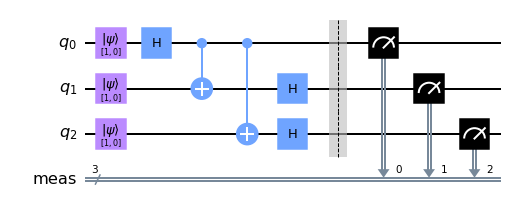

In [28]:
qc.draw(output='mpl')


In [69]:
# Initialize an empty list to store the arrays
measured_result_array = []

# Iterate through the measurements
for i in range(n_sample):
    # Initialize an array of zeros for each measurement
    result_array = np.zeros(nr_qubits, dtype=int)
    
    # Filter the DataFrame for the current measurement
    measurement_df = df[df.index % n_sample == i]
    
    # Fill in the results in the array based on the measurement basis
    for index, row in measurement_df.iterrows():
        basis = row["Measurement Basis"]
        result = row["Measured Result"]
        result_array[basis - 1] = result  # Subtract 1 as basis is 1-indexed
    
    # Append the array to the result_arrays list
    measured_result_array.append(result_array)

# result_arrays now contains the desired format
print(measured_result_array)

[array([0, 0, 1, 0]), array([0, 1, 1, 0])]
